<a href="https://colab.research.google.com/github/ArtemMusienko/HandwritingRecognition/blob/main/Handwriting_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем необходимые библиотеки для выполнения задачи:

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Загрузим необходимый датасет:

In [ ]:
#загрузка данных
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

Следующий код разделяет данные из массива dataset на две части: признаки (X) и целевые значения (Y).

In [ ]:
X = dataset[:, 1:785]  #признаки (пиксели изображений)
Y = dataset[:, 0]      #метки (буквы)

Этот код выполняет предварительную обработку данных перед их использованием в модели машинного обучения. Воспользуемся функцией **astype**:

In [ ]:
#нормализация данных (приведение значений пикселей к диапазону [0, 1])
X = X.astype('float32') / 255.0

Этот код преобразует метки в категориальный (**one-hot**) формат:

In [ ]:
#преобразование меток в one-hot encoding
Y = tf.keras.utils.to_categorical(Y, num_classes=26)

Этот код разделяет данные на обучающую и тестовую выборки с помощью функции **train_test_split** из библиотеки **scikit-learn**.

In [ ]:
#разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

Далее создадим последовательную модель (**Sequential**) из **TensorFlow**/**Keras**. **Sequential** — это линейный стек слоев, где каждый слой имеет ровно один вход и один выход.

В этом коде сеть состоит из последовательности двух слоев Dense, которые являются полносвязными нейронными слоями. Второй (и последний) слой — это 26-переменный слой потерь (softmax), возвращающий массив с 26 оценками вероятностей (в сумме дающих 1):

In [ ]:
#создание модели с использованием только полносвязных слоев
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),  #первый полносвязный слой
    layers.Dense(26, activation='softmax')                     #выходной слой (26 классов)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Метод **model.summary()** распечатывает сводное представление модели, включая информацию о слоях и их выходных формах, а также общее количество параметров в модели.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │          13,338 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415,258 (1.58 MB)

 Trainable params: 415,258 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

Следующий шаг - это компиляция модели.

На этом этапе мы должны задать:

* **оптимизатор** — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;

* **функцию потерь**, которая определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, как корректировать ее в правильном направлении;

* **метрики для мониторинга на этапах обучения и тестирования** — здесь нас
будет интересовать только точность (`accuracy` - доля правильно классифицированных изображений).

**categorical_crossentropy** — это функция потерь, которая используется в качестве сигнала обратной связи для обучения весовых тензоров и которую этап обучения стремится свести к минимуму. Cнижение потерь достигается за счет применения алгоритма стохастического градиентного спуска на небольших пакетах (мини-батчах). Точные правила, управляющие конкретным применением градиентного спуска, определяются оптимизатором adam, который передается в первом аргументе.



In [ ]:
#компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Теперь можно начинать обучение сети, для чего достаточно вызвать метод fit() модели, который адаптирует нашу модель (ее веса) под обучающие данные. Количество эпох = 10, а количество батчей = 256:

In [ ]:
#обучение модели
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8296 - loss: 0.6353 - val_accuracy: 0.9538 - val_loss: 0.1724
Epoch 2/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9597 - loss: 0.1487 - val_accuracy: 0.9662 - val_loss: 0.1230
Epoch 3/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9739 - loss: 0.0974 - val_accuracy: 0.9734 - val_loss: 0.0942
Epoch 4/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9799 - loss: 0.0721 - val_accuracy: 0.9764 - val_loss: 0.0841
Epoch 5/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9844 - loss: 0.0567 - val_accuracy: 0.9796 - val_loss: 0.0748
Epoch 6/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9881 - loss: 0.0444 - val_accuracy: 0.9810 - val_loss: 0.0692
Epoch 7/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9905 - loss: 0.0352 - val_accuracy: 0.9824 - val_loss: 0.0657
Epoch 8/10
932/932 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9930 - loss: 0.0273 - 

В процессе обучения отображаются 4 величины:
* `loss` - потери сети на обучающих данных;
* `accuracy` -  точность сети на обучающих данных;
* `val_loss` - потери сети на тестовых данных;
* `val_accuracy` -  точность сети на тестовых данных.

В данном случае мы достигли точности более 0,98 (>98%) на обучающих данных.

Теперь проверим, как модель распознает контрольный набор, с помощью метода модели `evaluate()`, передав ему в качестве позиционных аргументов тестовые изображения и метки:

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test) #оценивает производительность обученной модели
print('Точность на тестовом образце:', test_accuracy)
print('Потери на тестовом образце:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9839 - loss: 0.0622
Точность на тестовом образце: 0.984306812286377
Потери на тестовом образце: 0.05975205451250076


Вызов **model.fit()** возвращает объект **History**. Этот объект имеет поле **history** — словарь с данными обо всем происходившем в процессе обучения. Заглянем в него:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Построим *график потерь* на этапах обучения и проверки:

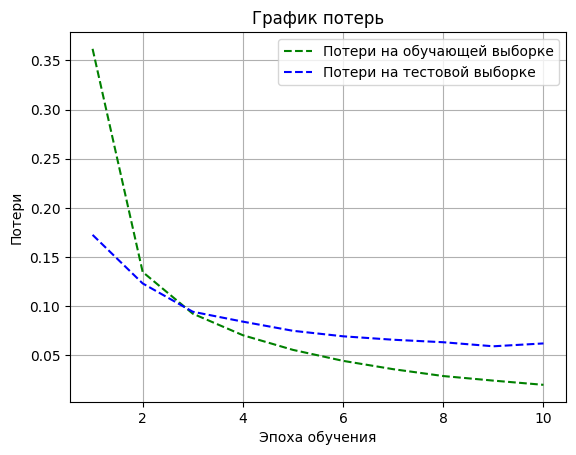

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g--', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b--', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.grid()
plt.show()

Построим *график точности* на этапах обучения и проверки:

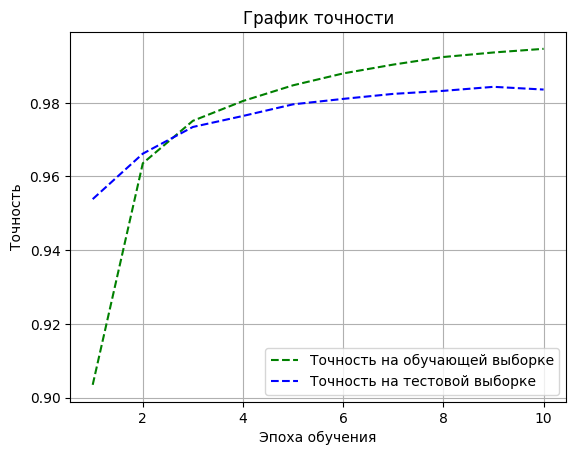

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g--', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b--', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.grid()
plt.show()

**Вывод по 2-ум графикам:**


На графиках видно, что на этапе обучения потери снижаются с каждой эпохой, а точность растет. Именно такое поведение ожидается от оптимизации градиентным спуском: величина, которая пытается минимизироваться, должна становиться
все меньше с каждой итерацией. После 4 эпохи изменения минимальны, но при этом тренд улучшения показателей сохранен до 10 эпохи. Данные обучающей и тестовой выборок демонстрируют одинаковые результаты на 3 эпохе. В данном случае наблюдается переобучение: после 3 эпохи произошла чрезмерная оптимизация на обучающих данных. В данном случае для предотвращения переобучения можно прекратить обучение после третьей эпохи.

Следующий код выполняет следующие *задачи*: делает предсказания на тестовых данных, преобразует предсказанные вероятности в метки классов, преобразует истинные метки из one-hot encoding в числовой формат, создает словарь для преобразования цифр в буквы, визуализирует первые 25 изображений из тестового набора, показывая предсказанные и истинные метки.

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


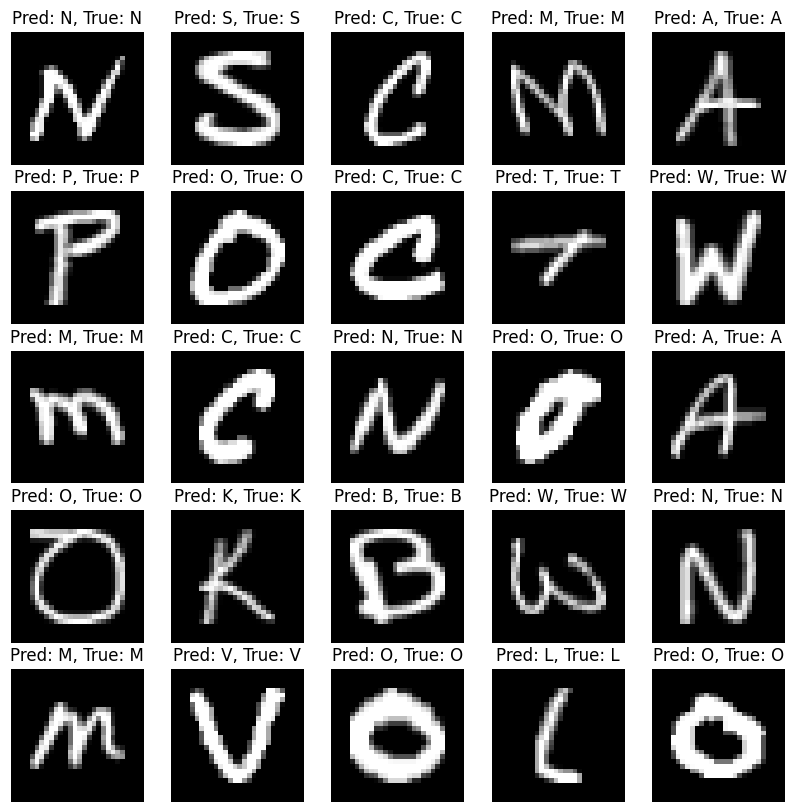

In [ ]:
#предсказание на тестовых данных
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

#визуализация некоторых предсказаний
word_dict = {i: chr(65 + i) for i in range(26)}  #словарь для преобразования цифр в буквы

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.axis('off')
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {word_dict[y_pred_classes[i]]}, True: {word_dict[y_true_classes[i]]}')
plt.show()